# **Práctica 5: Métricas de distancia (datos estandarizados)**

Nombre: Fernando Medina Segura

Número de cuenta: 317174948

Email: fernando.med.seg@gmail.com

**Objetivo.** Obtener las matrices de distancia (Euclidiana, Chebyshev, Manhattan, Minkowski) a partir de una matriz de datos.


**Fuente de datos:**

Los datos analizados fueron proporcionados por el profesor y son del “Winsconsin Diagnostic Breast Cancer” o “Diagnóstico de Cáncer de Mama en Winsconsin”, en los datos tenemos originalmente un total de 12 variables o características distintas, las cuáles son las siguientes:

* IDNumber: Identificador numérico del paciente.
* Diagnóstico: M si es maligno, B si es benigno.
* Radio
* Textura
* Perímetro
* Área
* Suavidad
* Compacidad o Compactación
* Convavidad 
* Puntos Concavos
* Simetría
* Dimensión Fractal

Se tiene un total de 569 datos.

La fuente de datos es "WDBCOriginal.csv"

#### **1) Importar las bibliotecas necesarias**


In [1]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para generar gráficas a partir de los datos
from scipy.spatial.distance import cdist    # Para el cálculo de distancias
from scipy.spatial import distance
import seaborn as sns

#### **2) Importar los datos**

In [2]:
DatosCancer = pd.read_csv("WDBCOriginal.csv")
DatosCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [3]:
DatosCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDNumber          569 non-null    object 
 1   Diagnosis         569 non-null    object 
 2   Radius            569 non-null    float64
 3   Texture           569 non-null    float64
 4   Perimeter         569 non-null    float64
 5   Area              569 non-null    float64
 6   Smoothness        569 non-null    float64
 7   Compactness       569 non-null    float64
 8   Concavity         569 non-null    float64
 9   ConcavePoints     569 non-null    float64
 10  Symmetry          569 non-null    float64
 11  FractalDimension  569 non-null    float64
dtypes: float64(10), object(2)
memory usage: 53.5+ KB


#### **3) Selección de características**

Antes de calcular las matrices de distancias, primero debemos reducir la dimensionalidad eliminando algunas características dependiendo de su coeficiente de correlación.

**Tipos de datos**

El atributo **dtypes** muestra los tipos de datos de variables.
Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante)

In [4]:
DatosCancer.dtypes

IDNumber             object
Diagnosis            object
Radius              float64
Texture             float64
Perimeter           float64
Area                float64
Smoothness          float64
Compactness         float64
Concavity           float64
ConcavePoints       float64
Symmetry            float64
FractalDimension    float64
dtype: object

**Identificación de datos faltantes**

Una función útil de pandas es **isnull().sum()** que regresa la suma de todos los valores nulos en cada variable

In [5]:
DatosCancer.isnull().sum()

IDNumber            0
Diagnosis           0
Radius              0
Texture             0
Perimeter           0
Area                0
Smoothness          0
Compactness         0
Concavity           0
ConcavePoints       0
Symmetry            0
FractalDimension    0
dtype: int64

**Identificación de relaciones entre variables**

In [6]:
DatosCancer.corr()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

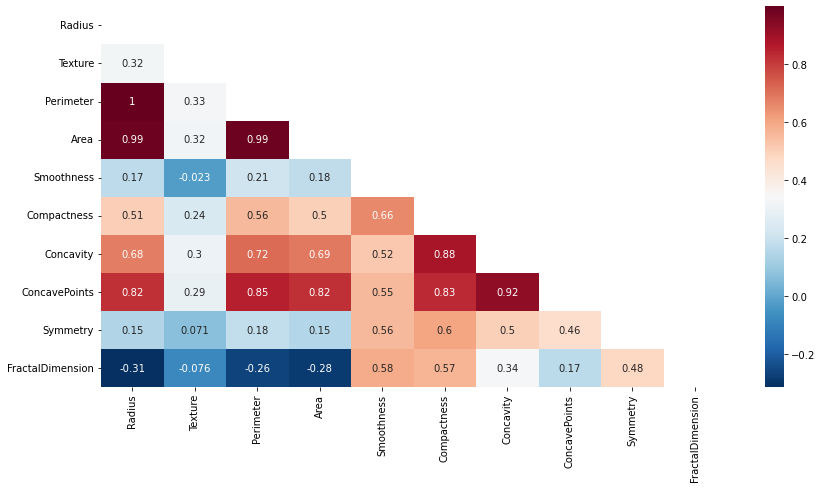

In [7]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosCancer.corr())
sns.heatmap(DatosCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show

Se traza un mapa de colores a través de la biblioteca de Seaborn.

La intensidad del color es proporcional a los valores de los coeficientes de correlación.

De acuerdo al mapa, las características que presentan un mayor coeficiente de correlación son el Perímetro y el Área, esto tiene sentido, pues esos valores se calculan con el radio, y también perímetro y área estan fuertemente relacionados, por lo que esas características son las que se van a eliminar, también en menor medida pero aun con un alto coeficiente de correlación, las características de concavidad y puntos concavos tienen una correlación fuerte con otras características, por ejemplo, la concavidad tiene una correlación alta con el radio, el perímetro, el área y la compacidad, mientras que los puntos concavos presentan una correlación con el radio, el perímetro, el área, la compacidad y la concavidad, por lo que estas dos características también se deben de eliminar.

In [8]:
DatosCancer = DatosCancer.drop(columns=['Perimeter','Area','Concavity','ConcavePoints'])
DatosCancer

,IDNumber,Diagnosis,Radius,Texture,Smoothness,Compactness,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,P-842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,P-84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,P-84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,P-84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,0.11100,0.11590,0.1726,0.05623
565,P-926682,M,20.13,28.25,0.09780,0.10340,0.1752,0.05533
566,P-926954,M,16.60,28.08,0.08455,0.10230,0.1590,0.05648
567,P-927241,M,20.60,29.33,0.11780,0.27700,0.2397,0.07016


Es importante también considerar que las características de Número de ID y Diagnóstico no son de tipo numérico, por lo que debemos de eliminarlos, porque en caso contario, no será posible calcular las matrices de distancia de los datos.

In [9]:
DatosCancer = DatosCancer.drop(columns=['IDNumber','Diagnosis'])
DatosCancer

,Radius,Texture,Smoothness,Compactness,Symmetry,FractalDimension
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.1726,0.05623
565,20.13,28.25,0.09780,0.10340,0.1752,0.05533
566,16.60,28.08,0.08455,0.10230,0.1590,0.05648
567,20.60,29.33,0.11780,0.27700,0.2397,0.07016


In [30]:
DatosCancer.corr()

,Radius,Texture,Smoothness,Compactness,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631
Texture,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437
Smoothness,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792
Compactness,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369
Symmetry,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

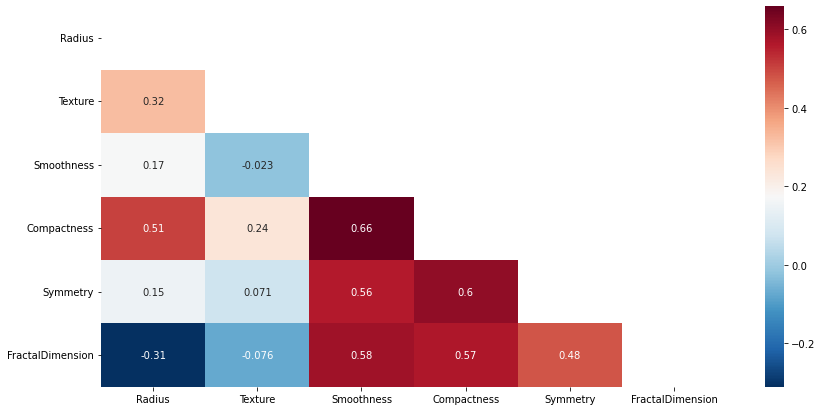

In [29]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosCancer.corr())
sns.heatmap(DatosCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show

**Estandarización de datos**

En los algoritmos basados en distancias es fundamental escalar o normalizar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                    # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(DatosCancer) # Se calculan la media y desviación y se escalan los datos

In [11]:
pd.DataFrame(MEstandarizada) 

,0,1,2,3,4,5
0,1.097064,-2.073335,1.568466,3.283515,2.217515,2.255747
1,1.829821,-0.353632,-0.826962,-0.487072,0.001392,-0.868652
2,1.579888,0.456187,0.942210,1.052926,0.939685,-0.398008
3,-0.768909,0.253732,3.283553,3.402909,2.867383,4.910919
4,1.750297,-1.151816,0.280372,0.539340,-0.009560,-0.562450
...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,-0.312589,-0.931027
565,1.704854,2.085134,0.102458,-0.017833,-0.217664,-1.058611
566,0.702284,2.045574,-0.840484,-0.038680,-0.809117,-0.895587
567,1.838341,2.336457,1.525767,3.272144,2.137194,1.043695


#### **4) Matrices de distancia**

**a) Matriz de distancias: Euclidiana**

In [12]:
DstEuclidiana = cdist(MEstandarizada, MEstandarizada, metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)

In [13]:
print(MEuclidiana)
#MEuclidiana 

          0         1         2          3         4         5         6    \
0    0.000000  6.174365  4.546932   4.396037  4.834014  3.196418  5.690578   
1    6.174365  0.000000  2.705871   8.987098  1.736955  5.153350  1.241247   
2    4.546932  2.705871  0.000000   6.961528  2.060248  3.584659  1.860336   
3    4.396037  8.987098  6.961528   0.000000  7.985967  4.429263  8.194171   
4    4.834014  1.736955  2.060248   7.985967  0.000000  4.053390  1.570818   
..        ...       ...       ...        ...       ...       ...       ...   
564  5.921501  2.308341  1.705874   8.241077  2.132934  4.614548  1.631764   
565  6.901117  2.670445  2.509312   8.743409  3.333390  5.443185  2.040145   
566  7.283727  2.808277  3.312376   9.025491  3.696259  5.644511  2.208106   
567  4.633922  5.926417  3.518554   5.452615  5.327597  4.694021  5.113101   
568  8.833518  4.706411  6.040155  10.353611  5.772387  7.049799  4.591626   

          7         8         9    ...       559       560     

In [14]:
print(MEuclidiana.round(3))

       0      1      2       3      4      5      6      7      8      9    \
0    0.000  6.174  4.547   4.396  4.834  3.196  5.691  3.606  3.548  3.922   
1    6.174  0.000  2.706   8.987  1.737  5.153  1.241  4.607  5.405  6.043   
2    4.547  2.706  0.000   6.962  2.060  3.585  1.860  2.791  3.248  4.180   
3    4.396  8.987  6.962   0.000  7.986  4.429  8.194  4.592  4.049  3.636   
4    4.834  1.737  2.060   7.986  0.000  4.053  1.571  3.850  4.558  5.261   
..     ...    ...    ...     ...    ...    ...    ...    ...    ...    ...   
564  5.922  2.308  1.706   8.241  2.133  4.615  1.632  3.991  4.569  5.258   
565  6.901  2.670  2.509   8.743  3.333  5.443  2.040  4.463  5.033  5.509   
566  7.284  2.808  3.312   9.025  3.696  5.645  2.208  4.724  5.402  5.570   
567  4.634  5.926  3.519   5.453  5.328  4.694  5.113  3.635  3.317  3.491   
568  8.834  4.706  6.040  10.354  5.772  7.050  4.592  6.401  7.155  7.171   

     ...    559    560     561    562    563    564    565    5

Matriz de distancias de una parte del total de objetos

In [15]:
DstEuclidiana = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='euclidean')
MEuclidiana = pd.DataFrame(DstEuclidiana)
print(MEuclidiana) 

          0         1         2         3         4         5         6  \
0  0.000000  6.174365  4.546932  4.396037  4.834014  3.196418  5.690578   
1  6.174365  0.000000  2.705871  8.987098  1.736955  5.153350  1.241247   
2  4.546932  2.705871  0.000000  6.961528  2.060248  3.584659  1.860336   
3  4.396037  8.987098  6.961528  0.000000  7.985967  4.429263  8.194171   
4  4.834014  1.736955  2.060248  7.985967  0.000000  4.053390  1.570818   
5  3.196418  5.153350  3.584659  4.429263  4.053390  0.000000  4.335135   
6  5.690578  1.241247  1.860336  8.194171  1.570818  4.335135  0.000000   
7  3.606113  4.606730  2.791344  4.591793  3.850141  1.475235  3.716812   
8  3.547616  5.405096  3.247766  4.049308  4.558298  1.808325  4.464338   
9  3.922413  6.042736  4.179641  3.636384  5.260896  2.603077  5.093631   

          7         8         9  
0  3.606113  3.547616  3.922413  
1  4.606730  5.405096  6.042736  
2  2.791344  3.247766  4.179641  
3  4.591793  4.049308  3.636384  
4  3

Distancia entre dos objetos

In [16]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstEuclidiana = distance.euclidean(Objeto1,Objeto2)
dstEuclidiana 

6.174364788678739

**b) Matriz de distancias: Chebyshev**

In [17]:
DstChebyshev = cdist(MEstandarizada, MEstandarizada, metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)

In [18]:
print(MChebyshev)

          0         1         2         3         4         5         6    \
0    0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1    3.770586  0.000000  1.769173  5.779572  1.107334  3.064384  0.703826   
2    2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.065347   
3    2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4    2.818197  1.107334  1.608003  5.473369  0.000000  2.452455  1.312466   
..        ...       ...       ...       ...       ...       ...       ...   
564  3.186774  1.868805  1.252274  5.841946  1.873289  2.821032  1.164978   
565  4.158469  2.438766  1.628947  5.969531  3.236950  2.948616  1.924485   
566  4.118909  2.399206  1.782694  5.806506  3.197390  3.077905  1.884924   
567  4.409792  3.759215  2.219218  3.867224  3.488274  3.171792  3.183849   
568  4.680551  3.638222  4.054295  6.395638  3.558698  5.349506  2.988949   

          7         8         9    ...       559       560       561  \
0  

Matriz de distancias de una parte del total de objetos

In [19]:
DstChebyshev = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='chebyshev')
MChebyshev = pd.DataFrame(DstChebyshev)
print(MChebyshev)

          0         1         2         3         4         5         6  \
0  0.000000  3.770586  2.653755  2.655172  2.818197  2.039179  3.195219   
1  3.770586  0.000000  1.769173  5.779572  1.107334  3.064384  0.703826   
2  2.653755  1.769173  0.000000  5.308927  1.608003  2.288013  1.065347   
3  2.655172  5.779572  5.308927  0.000000  5.473369  3.020914  5.673251   
4  2.818197  1.107334  1.608003  5.473369  0.000000  2.452455  1.312466   
5  2.039179  3.064384  2.288013  3.020914  2.452455  0.000000  2.652337   
6  3.195219  0.703826  1.065347  5.673251  1.312466  2.652337  0.000000   
7  2.431785  2.529006  2.058361  3.250566  2.222803  1.193785  2.422685   
8  2.662165  3.028801  1.970470  3.338458  2.134912  1.424165  2.334794   
9  3.178774  3.651748  3.181104  2.127824  3.345546  1.940774  3.545428   

          7         8         9  
0  2.431785  2.662165  3.178774  
1  2.529006  3.028801  3.651748  
2  2.058361  1.970470  3.181104  
3  3.250566  3.338458  2.127824  
4  2

Distancia entre dos objetos

In [20]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstChebyshev = distance.chebyshev(Objeto1,Objeto2)
dstChebyshev

3.7705863435627216

**c) Matriz de distancias: Manhattan**

In [21]:
DstManhattan = cdist(MEstandarizada, MEstandarizada, metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)

In [22]:
print(MManhattan)

           0          1          2          3          4          5    \
0     0.000000  13.958996   9.800776   9.332562  10.652292   7.097428   
1    13.958996   0.000000   5.777859  19.852153   3.328610  11.346356   
2     9.800776   5.777859   0.000000  14.479204   4.067523   7.188136   
3     9.332562  19.852153  14.479204   0.000000  18.141817   9.469203   
4    10.652292   3.328610   4.067523  18.141817   0.000000   8.672614   
..         ...        ...        ...        ...        ...        ...   
564  13.116694   4.307571   3.515182  17.795122   3.987343  10.504054   
565  15.283153   4.371407   5.482377  19.961581   4.721745  12.670513   
566  16.422799   4.826100   7.587671  20.311667   7.076972  13.020599   
567   6.497512  12.858705   7.580711  11.175940  11.307417  10.204073   
568  21.169775   9.291532  12.334647  22.116256  11.826783  15.410257   

           6          7          8          9    ...        559        560  \
0    12.494569   7.235915   7.247473   7.4313

Matriz de distancias de una parte del total de objetos

In [23]:
DstManhattan = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='cityblock')
MManhattan = pd.DataFrame(DstManhattan)
print(MManhattan)

           0          1          2          3          4          5  \
0   0.000000  13.958996   9.800776   9.332562  10.652292   7.097428   
1  13.958996   0.000000   5.777859  19.852153   3.328610  11.346356   
2   9.800776   5.777859   0.000000  14.479204   4.067523   7.188136   
3   9.332562  19.852153  14.479204   0.000000  18.141817   9.469203   
4  10.652292   3.328610   4.067523  18.141817   0.000000   8.672614   
5   7.097428  11.346356   7.188136   9.469203   8.672614   0.000000   
6  12.494569   2.624425   4.102829  17.359162   3.001054   9.881929   
7   7.235915  10.649573   5.067188   9.412016   8.939237   2.916854   
8   7.247473  12.697654   6.919795   7.824695  10.987318   3.333371   
9   7.431327  13.670172   8.177087   7.885395  11.959836   5.018553   

           6          7          8          9  
0  12.494569   7.235915   7.247473   7.431327  
1   2.624425  10.649573  12.697654  13.670172  
2   4.102829   5.067188   6.919795   8.177087  
3  17.359162   9.412016   

Distancia entre dos objetos

In [24]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstManhattan = distance.cityblock(Objeto1,Objeto2)
dstManhattan

13.958996337612154

**d) Matriz de distancias: Minkowski**

In [25]:
DstMinkowski = cdist(MEstandarizada, MEstandarizada, metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)

In [26]:
print(MMinkowski)

           0          1         2          3          4         5    \
0     0.000000   8.024946  5.795809   5.595649   6.209926  4.121053   
1     8.024946   0.000000  3.429022  11.581777   2.131193  6.628859   
2     5.795809   3.429022  0.000000   8.727855   2.522958  4.470394   
3     5.595649  11.581777  8.727855   0.000000  10.371214  5.621238   
4     6.209926   2.131193  2.522958  10.371214   0.000000  5.151873   
..         ...        ...       ...        ...        ...       ...   
564   7.648649   2.767302  2.129300  10.502352   2.526924  6.001116   
565   8.902267   3.022785  3.221726  11.376809   3.578288  7.161706   
566   9.495759   3.283349  4.330037  11.692915   4.429834  7.396528   
567   5.025433   7.630066  4.486478   6.823026   6.773720  5.984783   
568  11.777659   5.760876  7.549146  13.168208   7.256028  8.971317   

           6         7         8         9    ...        559        560  \
0     7.358437  4.476474  4.406202  4.741346  ...   8.878612   8.669870 

Matriz de distancias de una parte del total de objetos

In [27]:
DstMinkowski = cdist(MEstandarizada[0:10], MEstandarizada[0:10], metric='minkowski', p=1.5)
MMinkowski = pd.DataFrame(DstMinkowski)
print(MMinkowski)

          0          1         2          3          4         5          6  \
0  0.000000   8.024946  5.795809   5.595649   6.209926  4.121053   7.358437   
1  8.024946   0.000000  3.429022  11.581777   2.131193  6.628859   1.577910   
2  5.795809   3.429022  0.000000   8.727855   2.522958  4.470394   2.390133   
3  5.595649  11.581777  8.727855   0.000000  10.371214  5.621238  10.409542   
4  6.209926   2.131193  2.522958  10.371214   0.000000  5.151873   1.893739   
5  4.121053   6.628859  4.470394   5.621238   5.151873  0.000000   5.642721   
6  7.358437   1.577910  2.390133  10.409542   1.893739  5.642721   0.000000   
7  4.476474   6.046537  3.330113   5.745216   5.063139  1.801129   4.779731   
8  4.406202   7.146439  4.128175   4.894821   6.098181  2.162204   5.842336   
9  4.741346   7.854955  5.113147   4.646623   6.847261  3.186243   6.513767   

          7         8         9  
0  4.476474  4.406202  4.741346  
1  6.046537  7.146439  7.854955  
2  3.330113  4.128175  5.113

Distancia entre dos objetos

In [28]:
Objeto1 = MEstandarizada[0]
Objeto2 = MEstandarizada[1]
dstMinkowski = distance.minkowski(Objeto1,Objeto2, p=1.5)
dstMinkowski

8.02494572212642